In [1]:
import sqlite3
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Load

In [2]:
conn = sqlite3.connect('XXX/Housing/Data_house_final_WV.db')  # You can create a new database by changing the name within the quotes  
c = conn.cursor()
c.execute('''SELECT * FROM HOUSINGDATA''')

In [3]:
df_full = DataFrame(c.fetchall(), columns=['Generated_index','Timestamp','URL', 'beschreibung', 'ga_cd_developer_virtualreality','ga_cd_application_requirements', 'ga_cd_customer_group', 'ga_cd_cxp_historicallisting', 'ga_cd_maillead_default_shown', 'ga_cd_via', 'ga_cd_via_qualified', 'geo_bln', 'geo_krs', 'geo_land', 'geo_plz', 'obj_ExclusiveExpose', 'obj_barrierFree', 'obj_buildingType', 'obj_cId', 'obj_cellar', 'obj_condition', 'obj_constructionPhase', 'obj_courtage', 'obj_cwId', 'obj_energyEfficiencyClass', 'obj_energyType', 'obj_firingTypes', 'obj_galleryAd', 'obj_groupnumber', 'obj_heatingType', 'obj_houseNumber', 'obj_immotype', 'obj_interiorQual', 'obj_international', 'obj_ityp', 'obj_lastRefurbish', 'obj_livingSpace', 'obj_livingSpaceRange', 'obj_lotArea', 'obj_newlyConst', 'obj_noParkSpaces', 'obj_noRooms', 'obj_noRoomsRange', 'obj_numberOfFloors', 'obj_objectnumber', 'obj_picture', 'obj_picturecount', 'obj_plotAreaRange', 'obj_pricetrend', 'obj_pricetrendbuy', 'obj_pricetrendrent', 'obj_purchasePrice', 'obj_purchasePriceRange', 'obj_project_id', 'obj_regio1', 'obj_regio2', 'obj_regio3', 'obj_rented', 'obj_scoutId', 'obj_street', 'obj_streetPlain', 'obj_telekomDownloadSpeed', 'obj_telekomHdTelephone', 'obj_telekomHybridDownloadSpeed', 'obj_telekomHybridUploadSpeed', 'obj_telekomInternet', 'obj_telekomInternetProductAvailable', 'obj_telekomInternetProductName', 'obj_telekomInternetServices', 'obj_telekomInternetTechnology', 'obj_telekomInternetType', 'obj_telekomInternetUrl', 'obj_telekomInternetUrlMobile', 'obj_telekomTrackingGroup', 'obj_telekomTvOffer', 'obj_telekomUploadSpeed', 'obj_thermalChar', 'obj_usableArea', 'obj_yearConstructed', 'obj_yearConstructedRange', 'obj_zipCode'])

In [4]:
df_full.head(10)

,Generated_index,Timestamp,URL,beschreibung,ga_cd_developer_virtualreality,ga_cd_application_requirements,ga_cd_customer_group,ga_cd_cxp_historicallisting,ga_cd_maillead_default_shown,ga_cd_via,...,obj_telekomInternetUrl,obj_telekomInternetUrlMobile,obj_telekomTrackingGroup,obj_telekomTvOffer,obj_telekomUploadSpeed,obj_thermalChar,obj_usableArea,obj_yearConstructed,obj_yearConstructedRange,obj_zipCode
0,1,2019-09-06 08:40:59.977296,/expose/113387182,['Das im Jahr 1964 in massiver Bauweise erstel...,None,profile0,None,false,true,premium,...,https://padlock.link/ml,https://padlock.link/ioml,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,104.40,80.00,1964.0,2.0,86836
1,2,2019-09-06 08:41:00.286271,/expose/113387183,['Man betritt das Haus über den Windfang mit a...,None,profile0,None,false,true,standard,...,https://padlock.link/mm,https://padlock.link/iomm,telekom_layer_magenta_m,ONE_YEAR_FREE,10 MBit/s,200.20,NaN,1975.0,3.0,40670
2,3,2019-09-06 08:41:00.682282,/expose/113387200,['Wohnen auf einer Ebene. Zum Verkauf steht ei...,None,profile0,None,false,true,standard,...,https://padlock.link/ml,https://padlock.link/ioml,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,NaN,90.00,1962.0,2.0,52525
3,4,2019-09-06 08:41:01.055295,/expose/113387161,"['Dieses hochwertige, teilunterkellerte Zweifa...",None,profile0,None,false,true,standard,...,None,None,None,None,None,139.80,50.00,1973.0,3.0,41468
4,5,2019-09-06 08:41:01.316270,/expose/113387138,['Nur einen Katzensprung von Neunkirchen entfe...,None,profile0,None,false,true,top,...,https://padlock.link/ms,https://padlock.link/ioms,telekom_layer_magenta_s,NONE,"2,4 MBit/s",159.98,65.00,1994.0,5.0,66540
5,6,2019-09-06 08:41:01.526275,/expose/109658934,['Der o.a. Angebotspreis gilt für das Haus (ge...,None,profile0,home_builder,false,true,standard,...,None,None,None,None,None,NaN,NaN,2019.0,9.0,86459
6,7,2019-09-06 08:41:01.745280,/expose/111085050,['Generation 7: Zwei Traumhäuser in einem! Nut...,None,profile0,home_builder,false,true,standard,...,https://padlock.link/mshy,https://padlock.link/mshya,telekom_layer_magenta_s_hybrid,NONE,"2,4 MBit/s",NaN,NaN,NaN,NaN,86741
7,8,2019-09-06 08:41:01.978287,/expose/113387134,['Objektart:\tVierseithof bestehend aus 2 Wohn...,None,profile0,None,false,true,standard,...,https://padlock.link/ml,https://padlock.link/ioml,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,543.48,640.00,1900.0,1.0,94121
8,9,2019-09-06 08:41:02.228290,/expose/113387103,['Wadgassen ist eine Gemeinde im Landkreis Saa...,None,profile0,None,false,true,top,...,https://padlock.link/ml,https://padlock.link/ioml,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,NaN,58.03,1955.0,2.0,66787
9,10,2019-09-06 08:41:02.462267,/expose/113387101,['Bous ist eine Gemeinde im Landkreis Saarloui...,None,profile0,None,false,true,top,...,https://padlock.link/ml,https://padlock.link/ioml,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,116.50,56.63,1973.0,3.0,66359


# Data preperation

In [5]:
df_full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77220 entries, 0 to 77219
Data columns (total 81 columns):
Generated_index                        77220 non-null int64
Timestamp                              77220 non-null object
URL                                    77220 non-null object
beschreibung                           77220 non-null object
ga_cd_developer_virtualreality         1695 non-null object
ga_cd_application_requirements         77220 non-null object
ga_cd_customer_group                   8848 non-null object
ga_cd_cxp_historicallisting            77219 non-null object
ga_cd_maillead_default_shown           77220 non-null object
ga_cd_via                              77220 non-null object
ga_cd_via_qualified                    5013 non-null object
geo_bln                                77220 non-null object
geo_krs                                77220 non-null object
geo_land                               77220 non-null object
geo_plz                                77

In [6]:
df_full.Timestamp = pd.to_datetime(df_full.Timestamp)
df_full.Timestamp.dtypes

dtype('<M8[ns]')

In [7]:
df_full.shape

(77220, 81)

In [8]:
df_full = df_full.drop_duplicates(subset="URL")
df_full.shape

(77220, 81)

In [9]:
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

profile0                     77139
profile1_customersettings       81
Name: ga_cd_application_requirements, dtype: int64
false    77218
true         1
Name: ga_cd_cxp_historicallisting, dtype: int64
false    55625
true     21444
Name: obj_ExclusiveExpose, dtype: int64
n    73413
y     3807
Name: obj_barrierFree, dtype: int64
n    44886
y    32334
Name: obj_cellar, dtype: int64
y    51602
n    24520
Name: obj_courtage, dtype: int64
3,active        77219
103,inactive        1
Name: obj_ityp, dtype: int64
n    65760
y    11460
Name: obj_newlyConst, dtype: int64
n    71771
y     5449
Name: obj_rented, dtype: int64
true     60847
false       15
Name: obj_telekomHdTelephone, dtype: int64
true     60862
false     8141
Name: obj_telekomInternetProductAvailable, dtype: int64


In [10]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.replace("n",False).replace("y",True)
df_full.obj_barrierFree = df_full.obj_barrierFree.replace("n",False).replace("y",True)
df_full.obj_cellar = df_full.obj_cellar.replace("n",False).replace("y",True)
df_full.obj_courtage = df_full.obj_courtage.replace("n",False).replace("y",True)
df_full.obj_newlyConst = df_full.obj_newlyConst.replace("n",False).replace("y",True)
df_full.obj_rented = df_full.obj_rented.replace("n",False).replace("y",True)
df_full.obj_telekomHdTelephone = df_full.obj_telekomHdTelephone.replace("n",False).replace("y",True)
df_full.obj_telekomInternetProductAvailable = df_full.obj_telekomInternetProductAvailable.replace("n",False).replace("y",True)

In [11]:
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

profile0                     77139
profile1_customersettings       81
Name: ga_cd_application_requirements, dtype: int64
false    77218
true         1
Name: ga_cd_cxp_historicallisting, dtype: int64
false    55625
true     21444
Name: obj_ExclusiveExpose, dtype: int64
False    73413
True      3807
Name: obj_barrierFree, dtype: int64
False    44886
True     32334
Name: obj_cellar, dtype: int64
True     51602
False    24520
Name: obj_courtage, dtype: int64
3,active        77219
103,inactive        1
Name: obj_ityp, dtype: int64
False    65760
True     11460
Name: obj_newlyConst, dtype: int64
False    71771
True      5449
Name: obj_rented, dtype: int64
true     60847
false       15
Name: obj_telekomHdTelephone, dtype: int64
true     60862
false     8141
Name: obj_telekomInternetProductAvailable, dtype: int64


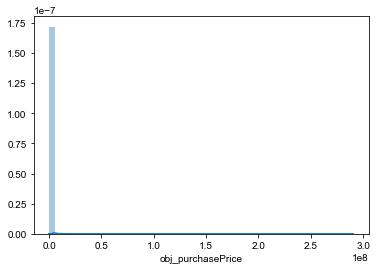

In [12]:
ax = sns.distplot(df_full['obj_purchasePrice'])
sns.set(rc={'figure.figsize':(10,10)})

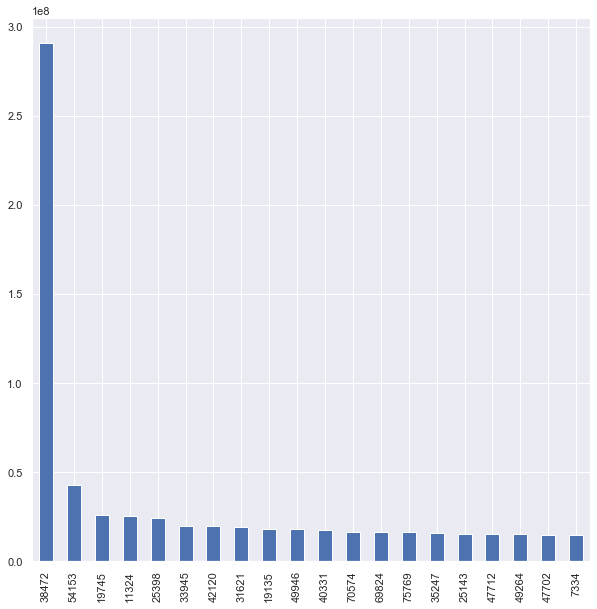

In [13]:
df_full.obj_purchasePrice.sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

In [14]:
df_full.iloc[38472,:][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_balcony", "obj_cellar",
                      "obj_condition", "URL", "obj_floor", "obj_garden",
                      "obj_hasKitchen", "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                      "obj_lift", "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", "obj_totalRent", 
                      "obj_typeOfFlat", "obj_yearConstructed", "index", "obj_purchasePrice"]]

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\pandas\core\series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


beschreibung           ['DHH   mit Keller EINZUGSBEREIT  !\n\nDiese h...
geo_bln                                                Baden_Württemberg
geo_krs                                                  Göppingen_Kreis
geo_plz                                                            73098
obj_balcony                                                          NaN
obj_cellar                                                          True
obj_condition                                             first_time_use
URL                                                    /expose/111749859
obj_floor                                                            NaN
obj_garden                                                           NaN
obj_hasKitchen                                                       NaN
obj_heatingType                                                heat_pump
obj_interiorQual                                                  normal
obj_lastRefurbish                                  

In [15]:
df_full.iloc[54153,:][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_balcony", "obj_cellar",
                      "obj_condition", "URL", "obj_floor", "obj_garden",
                      "obj_hasKitchen", "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                      "obj_lift", "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", "obj_totalRent", 
                      "obj_typeOfFlat", "obj_yearConstructed", "index", "obj_purchasePrice"]]

beschreibung           ['Vierseitgutshof in unvergleichlicher Weitbli...
geo_bln                                                           Bayern
geo_krs                                    Bad_Tölz_Wolfratshausen_Kreis
geo_plz                                                            82541
obj_balcony                                                          NaN
obj_cellar                                                         False
obj_condition                                             no_information
URL                                                    /expose/107736753
obj_floor                                                            NaN
obj_garden                                                           NaN
obj_hasKitchen                                                       NaN
obj_heatingType                                                     None
obj_interiorQual                                          no_information
obj_lastRefurbish                                  

In [16]:
df_full = df_full[df_full.URL != '/expose/111749859']
sum(df_full.obj_purchasePrice=='/expose/111749859')

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

In [17]:
sum(df_full.obj_purchasePrice==0)

206

In [18]:
df_full = df_full[df_full.obj_purchasePrice != 0]
sum(df_full.obj_purchasePrice==0)

0

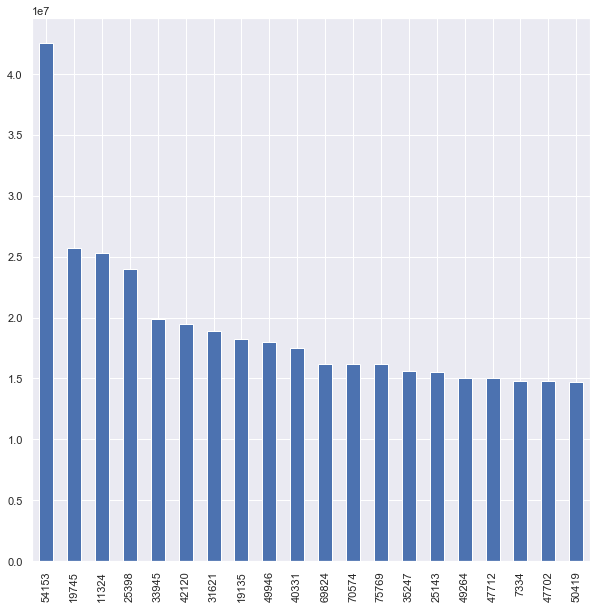

In [19]:
df_full.obj_purchasePrice.sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

In [20]:
sum(df_full.obj_purchasePrice <= 10000)

200

In [21]:
df_full.shape

(77013, 81)

In [22]:
df_full = df_full[df_full.obj_purchasePrice > 10000]
sum(df_full.obj_purchasePrice <= 10000)

0

In [23]:
df_full.shape

(76813, 81)

In [24]:
df_full['word_count'] = df_full['beschreibung'].apply(lambda x: len(str(x).split(" ")))
df_full[['word_count','beschreibung']].head()

,word_count,beschreibung
0,249,['Das im Jahr 1964 in massiver Bauweise erstel...
1,431,['Man betritt das Haus über den Windfang mit a...
2,240,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,382,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,242,['Nur einen Katzensprung von Neunkirchen entfe...


In [25]:
df_full['word_count_upper'] = df_full['beschreibung'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_full[['word_count_upper','beschreibung']].head()

,word_count_upper,beschreibung
0,5,['Das im Jahr 1964 in massiver Bauweise erstel...
1,1,['Man betritt das Haus über den Windfang mit a...
2,3,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,3,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,4,['Nur einen Katzensprung von Neunkirchen entfe...


In [26]:
df_full['beschreibung_length'] = df_full['beschreibung'].str.len() ## this also includes spaces
df_full[['beschreibung_length','beschreibung']].head()

,beschreibung_length,beschreibung
0,1948,['Das im Jahr 1964 in massiver Bauweise erstel...
1,3166,['Man betritt das Haus über den Windfang mit a...
2,1838,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,3334,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,1930,['Nur einen Katzensprung von Neunkirchen entfe...


In [27]:
df_full['price_per_m²_living'] = df_full['obj_purchasePrice'] / df_full['obj_livingSpace'] 
df_full['price_per_m²_living'] = df_full['price_per_m²_living'].replace(np.inf, np.nan)
df_full['price_per_m²_property'] = df_full['obj_purchasePrice'] / df_full['obj_lotArea'] 
df_full['price_per_m²_property'] = df_full['price_per_m²_property'].replace(np.inf, np.nan)

In [28]:
#Add Lat Long + Einwohner

In [29]:
df_full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76813 entries, 0 to 77219
Data columns (total 86 columns):
Generated_index                        76813 non-null int64
Timestamp                              76813 non-null datetime64[ns]
URL                                    76813 non-null object
beschreibung                           76813 non-null object
ga_cd_developer_virtualreality         1682 non-null object
ga_cd_application_requirements         76813 non-null object
ga_cd_customer_group                   8835 non-null object
ga_cd_cxp_historicallisting            76812 non-null object
ga_cd_maillead_default_shown           76813 non-null object
ga_cd_via                              76813 non-null object
ga_cd_via_qualified                    4995 non-null object
geo_bln                                76813 non-null object
geo_krs                                76813 non-null object
geo_land                               76813 non-null object
geo_plz                          

# Exploratory Data Analysis

## Location

In [30]:
grouped = df_full.groupby('obj_regio1').mean()
grouped = grouped[['obj_lastRefurbish','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_purchasePrice','obj_thermalChar','obj_usableArea','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property']]
grouped_count = df_full.groupby('obj_regio1').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_regio1','URL']], left_on='obj_regio1', right_on='obj_regio1')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped

,obj_regio1,obj_lastRefurbish,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_purchasePrice,obj_thermalChar,obj_usableArea,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,Amount_offers
0,baden_württemberg,2009.144828,207.125854,1264.537242,2.687922,7.264072,2.540967,14.725742,4.543468,6.075393e+05,153.610150,148.886913,1968.568633,326.410386,4.135657,2555.850330,3146.681024,1739.905991,8492
1,bayern,2009.799519,224.202021,1442.014036,2.491772,6.590619,2.362948,15.232623,4.187265,7.312668e+05,139.307284,142.888743,1976.961470,360.220575,5.184945,2844.342292,4084.478825,1956.274778,9711
2,berlin,2010.989051,246.833539,1023.939024,1.685590,7.369184,2.376384,12.588863,7.713549,1.184689e+06,132.581593,143.504023,1974.930667,357.552250,4.202899,2794.533944,4809.570665,3099.746330,1311
3,brandenburg,2009.423927,200.967610,2009.637326,2.627001,6.585887,1.962102,13.341861,7.077647,4.190709e+05,139.478439,224.534383,1968.254932,363.079280,3.870396,2816.628620,2416.992893,552.485450,3557
4,bremen,2009.526316,189.364159,541.644903,1.772414,6.582301,2.584775,15.169912,2.116402,4.009762e+05,169.454584,77.151954,1957.867589,333.198230,3.403540,2544.941593,2359.841661,5730.209110,565
5,hamburg,2012.474138,183.620074,834.386794,3.347926,5.941032,2.415344,13.884521,3.931239,1.019069e+06,152.318830,94.778367,1977.587744,413.463145,5.346437,3242.108108,5115.212634,2736.816248,814
6,hessen,2009.307927,212.483947,1089.403825,2.705791,7.188666,2.399157,14.170553,2.984594,5.631690e+05,160.181707,99.343321,1962.388416,366.525808,5.001710,2885.799285,2763.108571,1617.777198,6432
7,mecklenburg_vorpommern,2007.961120,205.727911,3422.564751,2.861859,6.795703,1.906977,14.778433,3.719967,3.292212e+05,139.545569,189.320889,1956.780398,359.560657,3.871946,2754.205560,2040.993422,1390.489585,2374
8,niedersachsen,2010.168171,195.883904,1762.750663,2.465185,6.635847,1.962954,15.348518,3.992882,3.468750e+05,157.655715,143.582060,1967.118613,356.666739,4.205691,2778.373296,2287.286125,1226.706961,9242
9,nordrhein_westfalen,2010.078897,209.606317,1386.758769,2.450163,6.965861,2.216651,15.084513,4.224973,4.738109e+05,158.551130,127.120415,1967.724421,372.627919,4.437542,2913.617021,2530.923248,4126.634912,13489


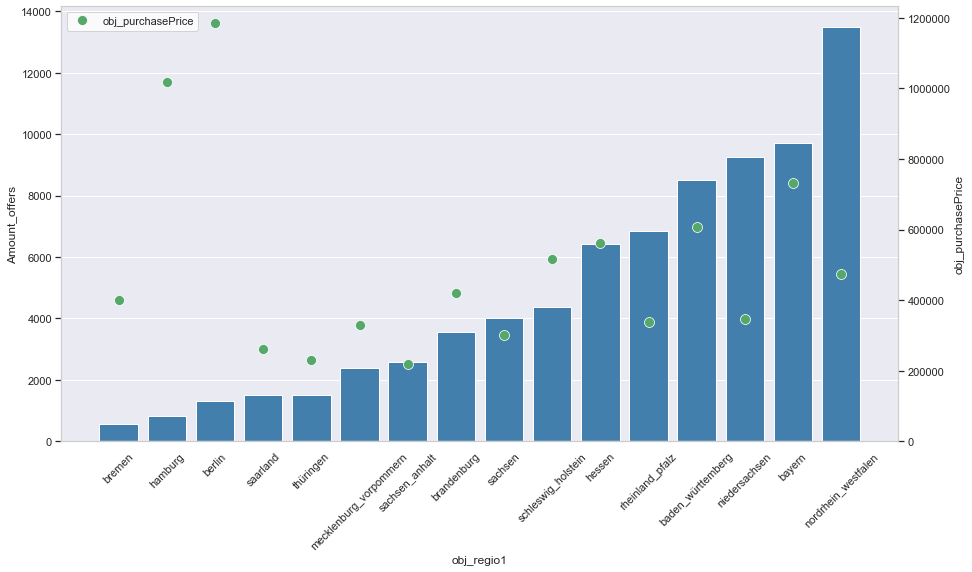

In [31]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('Amount_offers')
ax= sns.barplot(x = 'obj_regio1', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'obj_regio1', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

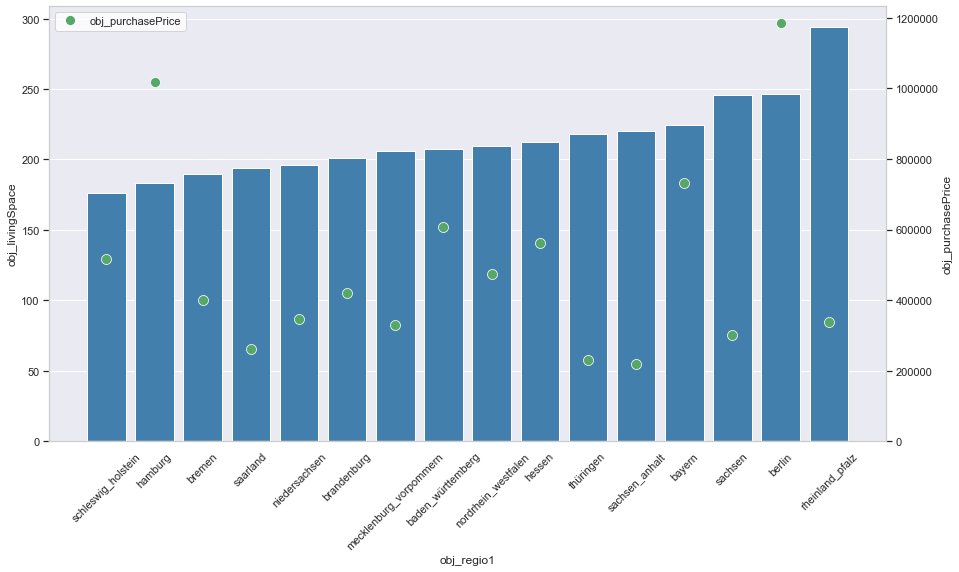

In [32]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_livingSpace')
ax= sns.barplot(x = 'obj_regio1', y = 'obj_livingSpace',  label='obj_livingSpace', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'obj_regio1', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

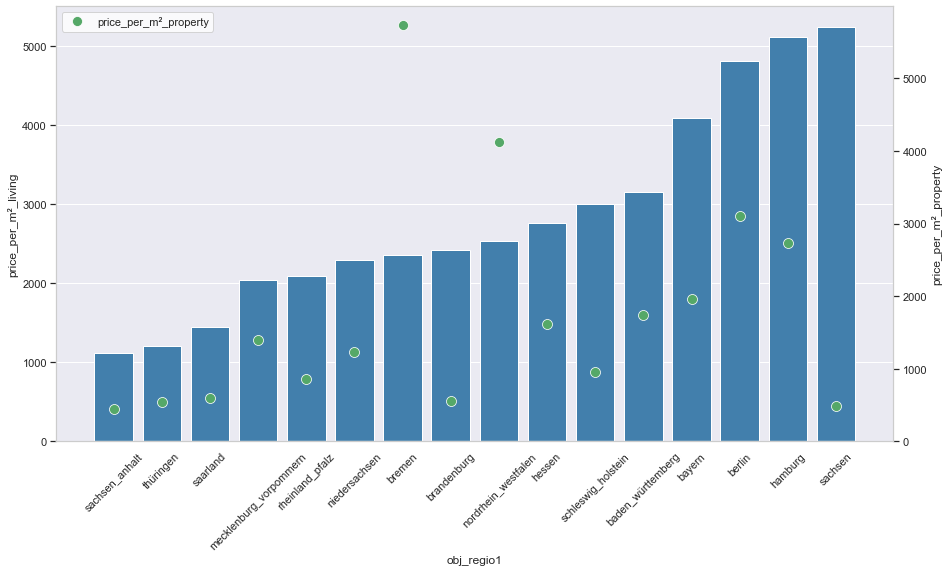

In [33]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'obj_regio1', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'obj_regio1', y = 'price_per_m²_property', marker="o",  label='price_per_m²_property', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

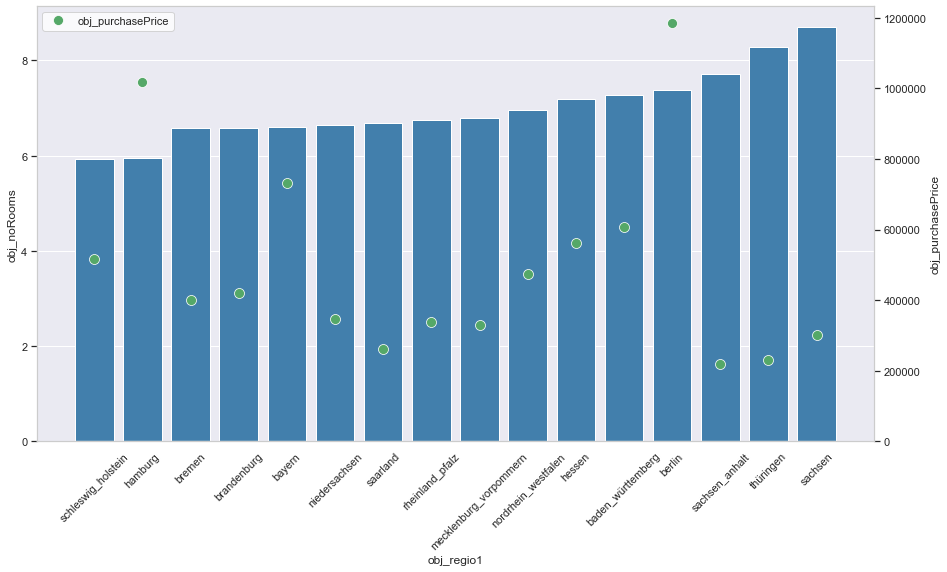

In [34]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_noRooms')
ax= sns.barplot(x = 'obj_regio1', y = 'obj_noRooms',  label='obj_noRooms', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'obj_regio1', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

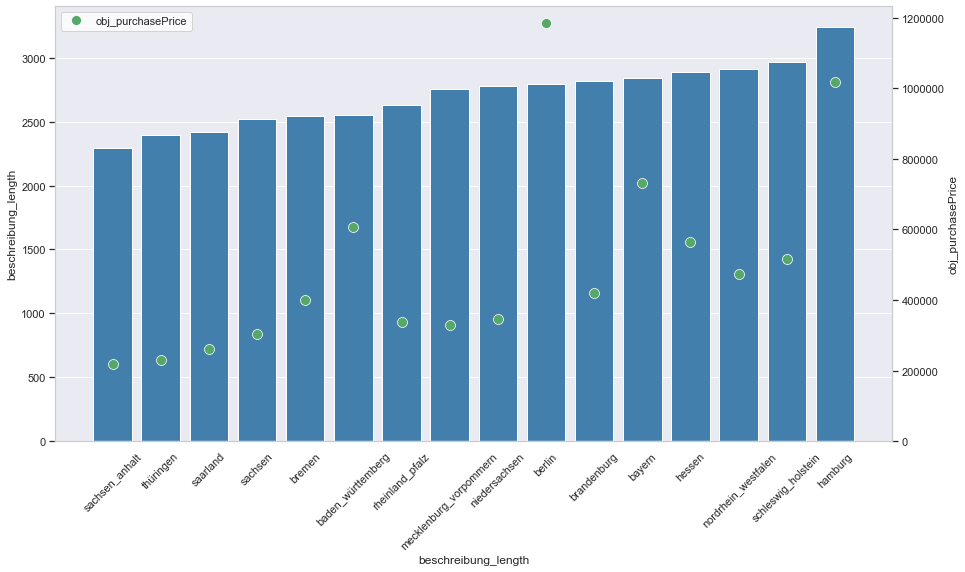

In [35]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('beschreibung_length')
ax= sns.barplot(x = 'beschreibung_length', y = 'beschreibung_length',  label='beschreibung_length', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'obj_regio1', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

In [36]:
grouped = df_full.groupby('obj_regio2').mean()
grouped = grouped[['obj_lastRefurbish','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_purchasePrice','obj_thermalChar','obj_usableArea','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property']]
grouped_count = df_full.groupby('obj_regio2').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_regio2','URL']], left_on='obj_regio2', right_on='obj_regio2')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")
grouped.head(10)

,obj_regio2,obj_lastRefurbish,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_purchasePrice,obj_thermalChar,obj_usableArea,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,Amount_offers
0,bad_tölz_wolfratshausen_kreis,2011.105263,237.082019,1484.487500,2.200000,6.399038,2.680556,14.192308,2.217451,1.951005e+06,112.613148,115.788919,1984.535714,380.451923,3.875000,2958.365385,7259.420663,2458.457419,104
1,miesbach_kreis,2011.190476,241.963714,1734.078095,2.765432,7.328571,2.357143,11.714286,4.511078,1.872263e+06,129.750000,177.881774,1985.043478,317.561905,4.304762,2471.447619,7228.736430,2118.585025,105
2,heidelberg,2006.105263,307.513617,663.106383,3.200000,10.563830,3.121212,14.042553,18.919362,1.869702e+06,163.620000,108.043600,1954.794872,358.212766,4.276596,2765.787234,5855.680869,4525.701746,47
3,baden_baden,2010.450000,357.377297,1094.986486,2.446429,9.310811,2.978261,13.324324,10.605972,1.839274e+06,114.605333,133.275333,1953.923077,323.391892,2.905405,2553.689189,4799.652800,1927.072811,74
4,starnberg_kreis,2012.477273,213.985171,2697.139430,2.179724,6.131179,2.500000,12.673004,3.680154,1.804345e+06,104.596667,108.017235,1995.768889,403.152091,5.977186,3183.555133,8145.481172,2899.513262,263
5,frankfurt_am_main,2010.285714,321.036415,527.651547,3.097561,11.052830,2.881356,11.233962,3.609102,1.763284e+06,144.316370,108.735032,1967.049383,380.324528,5.316981,2989.573585,5618.049252,7057.336246,265
6,münchen,2009.214286,184.633506,410.648880,1.500000,5.915975,2.839650,12.452282,4.292345,1.742900e+06,110.508047,119.558276,1991.779747,426.147303,6.545643,3363.321577,9091.631817,8260.141308,482
7,düsseldorf,2009.492958,339.175117,917.495070,2.229630,9.882629,2.574468,14.126761,5.413934,1.689482e+06,167.068704,99.168000,1964.301676,400.892019,4.821596,3146.511737,5347.804365,3446.776500,213
8,münchen_kreis,2013.461538,189.242943,519.733475,1.806167,5.679078,2.560694,13.631206,4.397097,1.635454e+06,120.606000,106.164398,1993.955102,424.049645,5.482270,3377.858156,8249.566610,3428.864025,282
9,rosenheim,2015.333333,262.841000,971.500000,2.000000,8.050000,2.500000,14.600000,6.162000,1.396850e+06,105.233846,115.280000,1980.750000,336.600000,2.750000,2572.250000,5442.073833,1996.686456,20


In [37]:
grouped = df_full.groupby('obj_regio2').mean()
grouped = grouped[['obj_lastRefurbish','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_purchasePrice','obj_thermalChar','obj_usableArea','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property']]
grouped_count = df_full.groupby('obj_regio2').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_regio2','URL']], left_on='obj_regio2', right_on='obj_regio2')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=True).reset_index(drop="True")
grouped.head(10)

,obj_regio2,obj_lastRefurbish,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_purchasePrice,obj_thermalChar,obj_usableArea,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,Amount_offers
0,kyffhäuserkreis,2001.363636,192.115385,1122.365385,2.111111,6.721154,2.125000,10.980769,1.962273,75810.557692,218.963125,381.200000,1902.736842,215.576923,4.423077,1744.980769,2035.967417,148.046826,52
1,mansfeld_südharz_kreis,2006.197183,150.952174,2219.808696,1.880435,5.850000,1.826446,12.839130,0.604660,91567.056522,219.501111,118.871698,1928.632979,230.330435,2.713043,1806.504348,633.240099,146.285752,230
2,unstrut_hainich_kreis,2004.269231,176.692661,903.688073,2.777778,6.394495,2.078947,14.908257,-6.921915,126928.788257,142.280909,139.415385,1926.681818,264.605505,4.055046,2100.605505,710.522628,241.942924,109
3,holzminden_kreis,2010.840000,187.515878,942.750000,2.471429,7.175676,2.015873,14.418919,-4.821200,138080.202703,231.513125,102.782381,1924.532258,327.331081,3.148649,2590.594595,807.750783,201.334200,148
4,salzlandkreis,2005.010989,227.078577,1162.807829,3.419048,7.592527,1.936620,12.039146,3.493234,140110.989324,201.023333,341.780886,1927.551331,274.548043,3.725979,2111.946619,743.139575,210.988557,281
5,sonneberg_kreis,2007.700000,160.200444,887.688889,2.307692,5.844444,2.250000,11.355556,1.832500,145057.511111,137.766667,143.974800,1942.057143,331.755556,4.955556,2600.133333,1012.463033,279.399528,45
6,hof_kreis,2009.433962,182.601827,1000.343198,2.155340,7.035533,2.169231,12.832487,-2.518592,152157.842640,185.212581,118.855224,1950.533333,295.736041,4.197970,2284.223350,882.870692,261.397779,197
7,schmalkalden_meiningen_kreis,2007.807692,163.409907,843.148148,2.660377,6.212963,2.234043,13.027778,4.833333,153823.648148,166.158636,148.807568,1948.382353,257.037037,2.481481,1985.444444,990.202793,251.790400,108
8,nordhausen_kreis,1995.428571,172.305714,1835.081633,2.047619,6.020408,1.928571,13.102041,2.936190,154966.244898,145.087500,62.394615,1943.692308,291.959184,2.877551,2350.693878,969.273340,197.706791,49
9,hildburghausen_kreis,2007.500000,222.957662,973.610390,2.259259,6.675325,2.282051,14.623377,-1.190000,160564.857143,115.740435,297.268800,1947.000000,273.974026,3.688312,2157.701299,838.268422,241.749245,77
